In [ ]:
import datetime
datetime.datetime.now()

datetime.datetime(2020, 9, 14, 9, 22, 27, 980069)

In [ ]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 19kB/s 
     |████████████████████████████████| 450kB 39.2MB/s 
     |████████████████████████████████| 3.9MB 38.3MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=22e6f839124b4ed8b86c16825e92e01f1dbebd9831763ee540354b088d1fe8eb
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

In [ ]:
pip install keras==2.3.1

     |████████████████████████████████| 378kB 7.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)


2.1.0
2.3.1


Using TensorFlow backend.


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/dataset/train"
valid_path  = "/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/dataset/valid"

In [ ]:

# Import the ResNet152V2 library as shown below and add preprocessing layer to the front of ResNet152V2
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/dataset/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3649 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 806 images belonging to 2 classes.


In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/model/resnet152v2.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 115 steps, validate for 26 steps
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


114/115 [============================>.] - ETA: 18s - loss: 0.3556 - accuracy: 0.9649
Epoch 00001: val_accuracy improved from -inf to 0.98263, saving model to /content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/model/resnet152v2.h5
115/115 [==============================] - 2610s 23s/step - loss: 0.3525 - accuracy: 0.9652 - val_loss: 0.2404 - val_accuracy: 0.9826
Epoch 2/10
114/115 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9842
Epoch 00002: val_accuracy did not improve from 0.98263
115/115 [==============================] - 96s 838ms/step - loss: 0.2626 - accuracy: 0.9844 - val_loss: 1.0991 - val_accuracy: 0.9578
Epoch 3/10
114/115 [============================>.] - ETA: 0s - loss: 0.1920 - accuracy: 0.9895
Epoch 00003: val_accuracy did not improve from 0.98263
115/115 [==============================] - 95s 824ms/step - loss: 0.1903 - accuracy: 0.9896 - val_loss: 0.4271 - val_accuracy: 0.9826
Epoch 4/10
114/115 [===========================

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/My ML Project /DL Project/CNN/mask detection/model/last_resnet152v2.h5')

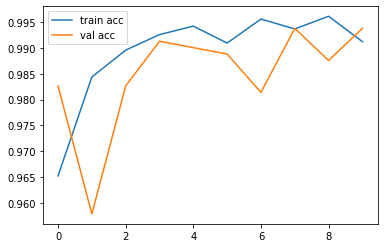

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
datetime.datetime.now()

NameError: ignored